# Apple, Inc. (AAPL) - Bagging Reggression on a Random Forest Model

---------

###  Overview: 
- 1) Importing the data.
- 2) Data Preprocessing.
- 3) Normalizing the data.
- 4) Modeling.

--------


## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import sys
sys.path.append('..')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

-----

## Company Name

In [2]:
company_name = 'Apple'

## Importing the Data:

In [3]:
from lib.helper import data_importer

In [4]:
df = data_importer(company_name)

In [5]:
df.head(3)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0


-------

## Importing the Shifted Data Set:

In [6]:
from lib.helper import date_shifter

In [7]:
df_shift = date_shifter(df)

In [8]:
df_shift.head()

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1980-12-15,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-16,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-17,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-18,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-19,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


### Taking a Look at the Time-Shifted Data Set:

In [9]:
df_shift.tail(3)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2018-03-23,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-26,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-27,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0


-------

# Splitting the Data into a Training and Testing Set

In [10]:
from lib.helper import import_split_data

In [11]:
X_train, X_test = import_split_data(company_name)

In [12]:
X_train.head(2)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
1981-04-15,27.88,28.00,27.88,27.88,29700.0,0.0,1.0,0.409914,0.411679,0.409914,...,27.100545,27.100545,395955.964908,0.0,1.0,0.399428,0.400780,0.398454,0.398454,2.217353e+07
1981-04-16,26.63,26.63,26.50,26.50,152000.0,0.0,1.0,0.391536,0.391536,0.389625,...,27.086579,27.086579,390282.570375,0.0,1.0,0.399245,0.400565,0.398249,0.398249,2.185582e+07


In [13]:
X_test.head(2)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,116.65,117.20,115.43,115.82,30586265.0,0.0,1.0,115.209202,115.752409,114.004271,...,110.936682,111.809549,3.262264e+07,0.006808,1.0,109.969134,110.881942,109.289159,110.149132,3.262266e+07
2017-01-04,115.80,116.33,114.76,116.15,28781865.0,0.0,1.0,114.369701,114.893155,113.342546,...,111.025596,111.910490,3.253332e+07,0.006650,1.0,110.071473,110.975226,109.383424,110.255324,3.253334e+07


-----

# Normalizing the Data with a MinMaxScaler


In [14]:
from lib.helper import mm_scaler

### Splitting the Data into a Train and Test Set:

In [15]:
X_train_sc, X_test_sc, y_train, y_test = mm_scaler(X_train, X_test, df)

-----

# Bagging Regressor Model

### Setting up the Bagging Regressor:

In [16]:
from lib.helper import br_model

In [17]:
from lib.helper import rf_model

In [18]:
rf = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2,
                           min_samples_leaf=1, bootstrap=False, 
                           n_jobs=3, random_state=42)

In [19]:
# br = BaggingRegressor(base_estimator=rf, n_estimators=100, max_samples=7, max_features=1.0, bootstrap=True, 
#                  bootstrap_features=False, n_jobs=3, 
#                  random_state=42)

Train Score: 0.6199100774804931
Test Score: -1.466978495369672
Predictive Mean: 177.71798775324672


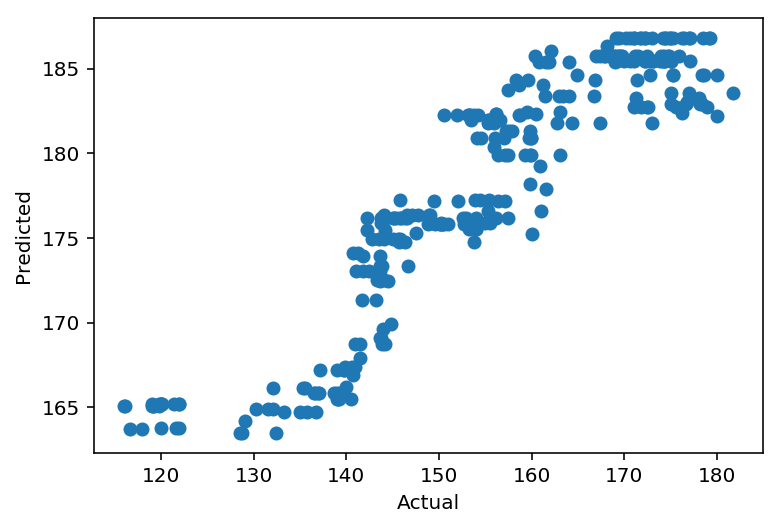

In [22]:
br = br_model(X_train_sc, y_train, X_test_sc, y_test, 
          base_estimator=rf, n_estimators=10, max_samples=7, 
          max_features=1.0, bootstrap=True)

### Fitting the Scaled Data with the Bagging Regressor Model:

In [23]:
br.fit(X_train_sc, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=3,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=7, n_estimators=10, n_jobs=3, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

### Scoring on the Training Data:

In [ ]:
br.score(X_train_sc, y_train)

### Scoring on the Testing Data

In [ ]:
br.score(X_test_sc, y_test)

### Inspecting the Average Prediction:

In [ ]:
y_test.mean()

In [ ]:
br.predict(X_test_sc).mean()

In [ ]:
plt.scatter(y_test, br.predict(X_test_sc))
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
# def pca_decomposition(X_train, X_test):
#     pca = PCA(n_components=1, random_state=42)
#     X_train_pca = pca.fit_transform(X_train_sc)
#     X_test_pca = pca.transform(X_train_sc)
#     return X_train_pca, X_test_pca
    

-----

# Decomposing Signal Components with Principal Component Analysis (PCA):

### Instantiating the PCA Decomposition:

In [ ]:
pca = PCA(n_components=1, random_state=42)

### Fitting and Transforming the Scaled Training Set with PCA Weights:

In [ ]:
X_train_pca = pca.fit_transform(X_train_sc)

### Fitting and Transforming the Scaled Training Set with PCA Weights:

In [ ]:
X_test_pca = pca.transform(X_train_sc)

### Fitting the PCA Weighted Training Data on a Random Forest Regressor Model:

In [ ]:
br.fit(X_train_pca, y_train)

## Scoring the PCA Weighted Training Data on a Random Forest Regressor Model:

In [ ]:
br.score(X_train_pca, y_train)

In [ ]:
# br.score(X_test_sc, y_test)

### Inspecting the Average Prediction Value of the PCA Weighted Training Data on a Random Forest Regressor Model:

In [ ]:
br.predict(X_test_pca).mean()

In [ ]:
plt.scatter(y_test, br.predict(X_test_sc))
plt.xlabel('Actual')
plt.ylabel('Predicted')

-----

# Grid Searching a Bagging Regressor Model:

In [ ]:
from sklearn.model_selection import GridSearchCV

--------

## GridSearching a Bagging Regressor with Weights:

In [ ]:
pipe = Pipeline([
    ('br', BaggingRegressor())
])

### Setting the Params

In [ ]:
# Number of trees in random forest
n_estimators = [x for x in range(8, 14, 2)]

### Setting up the Parameters with PCA Weights:

In [ ]:
params = {'br__n_estimators': n_estimators}
print(params)

### Gridsearching the Parameters with PCA:

In [ ]:
grid = GridSearchCV(pipe, params, n_jobs=3)

### Fitting the Scaled Data with a Weighted Model:

In [ ]:
grid.fit(X_train_pca, y_train)

### Scoring the Training Data:

In [ ]:
grid.score(X_train_pca, y_train)

### Scoring the Test Data:

In [ ]:
grid.score(X_test_pca, y_test)

In [ ]:
plt.scatter(y_test, grid.predict(X_test_sc))
plt.xlabel('Actual')
plt.ylabel('Predicted')